## Visualize correlations across profiles

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(devtools))

In [2]:
# The correct version of ComplexHeatmap was not available on anaconda
# https://anaconda.org/bioconda/bioconductor-complexheatmap
# Install it here
if (!("ComplexHeatmap" %in% rownames(installed.packages()))) {
    install_github("jokergoo/ComplexHeatmap@a387b860186be1d09249128be1ff46d13101e45d")
}

suppressPackageStartupMessages(library(ComplexHeatmap))

In [3]:
# Set constants
datasets <- c("cloneAE", "ixazomib", "cb5083")
data_dir <- "data"

output_dir <- file.path("figures", "heatmaps")

lgd_title_fontsize = 9
lgd_label_fontsize = 6.5
anno_name_height = 0.45
legend_scale_cols = circlize::colorRamp2(c(-1, 0, 1), c("blue", "white", "red"))

In [4]:
# Load profiles
dataset_file <- file.path(data_dir, "bulk_profiles_analytical_set.csv.gz")

data_cols <- readr::cols(
    .default = readr::col_double(),
    Metadata_Plate = readr::col_character(),
    Metadata_Well = readr::col_character(),
    Metadata_batch = readr::col_character(),
    Metadata_cell_count = readr::col_integer(),
    Metadata_clone_number = readr::col_character(),
    Metadata_plate_map_name = readr::col_character(),
    Metadata_treatment = readr::col_character(),
    Metadata_dataset = readr::col_character(),
    Metadata_clone_type = readr::col_character(),
    Metadata_clone_type_indicator = readr::col_integer(),
    Metadata_model_split = readr::col_character(),
    Metadata_cell_density = readr::col_character(),
    Metadata_plate_filename = readr::col_character(),
    Metadata_treatment_time = readr::col_character(),
    Metadata_unique_sample_name = readr::col_character(),
    Metadata_time_to_adhere = readr::col_character()
)

dataset_df <- readr::read_csv(dataset_file, col_types=data_cols)

print(dim(dataset_df))
head(dataset_df, 3)

[1]  612 3548


Metadata_Plate,Metadata_Well,Metadata_batch,Metadata_cell_count,Metadata_clone_number,Metadata_plate_map_name,Metadata_treatment,Metadata_dataset,Metadata_clone_type,Metadata_clone_type_indicator,⋯,Nuclei_Texture_Variance_RNA_10_02,Nuclei_Texture_Variance_RNA_10_03,Nuclei_Texture_Variance_RNA_20_00,Nuclei_Texture_Variance_RNA_20_01,Nuclei_Texture_Variance_RNA_20_02,Nuclei_Texture_Variance_RNA_20_03,Nuclei_Texture_Variance_RNA_5_00,Nuclei_Texture_Variance_RNA_5_01,Nuclei_Texture_Variance_RNA_5_02,Nuclei_Texture_Variance_RNA_5_03
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HCT116bortezomib,B03,2019_02_15_Batch1_20X,16508,WT_parental,PlateMap_HCT116bortezomib,0.1% DMSO,cloneAE,sensitive,0,⋯,-0.7936480,-0.7971384,-0.8497648,-0.8422521,-0.8371976,-0.8360676,-0.7911125,-0.7921908,-0.7929302,-0.7948077
HCT116bortezomib,B04,2019_02_15_Batch1_20X,15536,WT_parental,PlateMap_HCT116bortezomib,0.1% DMSO,cloneAE,sensitive,0,⋯,-0.6146661,-0.6211401,-0.6681232,-0.6482634,-0.6645153,-0.6630872,-0.6084365,-0.6124887,-0.6099403,-0.6126431
HCT116bortezomib,B05,2019_02_15_Batch1_20X,13969,WT_parental,PlateMap_HCT116bortezomib,0.1% DMSO,cloneAE,sensitive,0,⋯,-0.7211521,-0.7261770,-0.7334183,-0.7047708,-0.7273677,-0.7210842,-0.7165588,-0.7199086,-0.7220983,-0.7216850


In [5]:
# Load feature selection results
feat_file <- file.path(data_dir, "dataset_features_selected.tsv")

feat_cols <- readr::cols(
  features = readr::col_character(),
  dataset = readr::col_character()
)

features_df <- readr::read_tsv(feat_file, col_types = feat_cols)

print(dim(features_df))
head(features_df, 3)

[1] 901   2


features,dataset
<chr>,<chr>
Cells_AreaShape_Compactness,cloneAE
Cells_AreaShape_Extent,cloneAE
Cells_AreaShape_Orientation,cloneAE


In [6]:
# Load signature scores
score_file <- file.path("results", "singscore", "full_bulk_signature_singscore_results.tsv.gz")

score_cols <- readr::cols(
    .default = readr::col_character(),
    Metadata_cell_count = readr::col_integer(),
    Metadata_clone_type_indicator = readr::col_integer(),
    Metadata_plate_ID = readr::col_integer(),
    Metadata_celltype_shorthand_from_plate_graph = readr::col_integer(),
    Metadata_date = readr::col_integer(),
    Metadata_treatment_shorthand_from_plate_graph = readr::col_integer(),
    TotalScore = readr::col_double(),
    TotalDispersion = readr::col_double(),
    UpScore = readr::col_double(),
    UpDispersion = readr::col_double(),
    DownScore = readr::col_double(),
    DownDispersion = readr::col_double(),
    Metadata_permuted_p_value = readr::col_double(),
    min_permuted_value = readr::col_double(),
    max_permuted_value = readr::col_double()
)

score_df <- readr::read_tsv(score_file, col_types = score_cols)

print(dim(score_df))
head(score_df, 3)

[1] 1836   31


Metadata_Plate,Metadata_Well,Metadata_batch,Metadata_cell_count,Metadata_clone_number,Metadata_plate_map_name,Metadata_treatment,Metadata_dataset,Metadata_clone_type,Metadata_clone_type_indicator,⋯,TotalDispersion,UpScore,UpDispersion,DownScore,DownDispersion,Metadata_permuted_p_value,dataset,signature,min_permuted_value,max_permuted_value
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
HCT116bortezomib,B03,2019_02_15_Batch1_20X,16508,WT_parental,PlateMap_HCT116bortezomib,0.1% DMSO,cloneAE,sensitive,0,⋯,1859.180,-0.07708926,1355.096,-0.03398437,504.0840,0.799,cloneAE,cloneAE,-0.2259416,0.2257603
HCT116bortezomib,B04,2019_02_15_Batch1_20X,15536,WT_parental,PlateMap_HCT116bortezomib,0.1% DMSO,cloneAE,sensitive,0,⋯,1865.852,-0.12589540,1313.584,-0.01583807,552.2685,0.849,cloneAE,cloneAE,-0.2259416,0.2257603
HCT116bortezomib,B05,2019_02_15_Batch1_20X,13969,WT_parental,PlateMap_HCT116bortezomib,0.1% DMSO,cloneAE,sensitive,0,⋯,2093.431,-0.03931211,1283.932,0.04009233,809.4996,0.490,cloneAE,cloneAE,-0.2259416,0.2257603


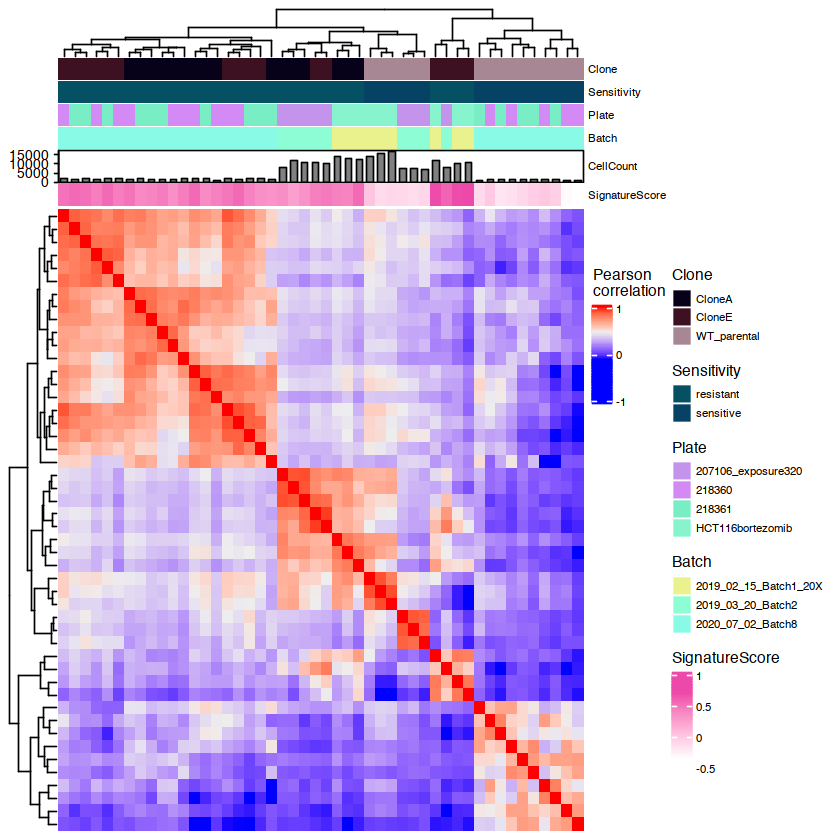

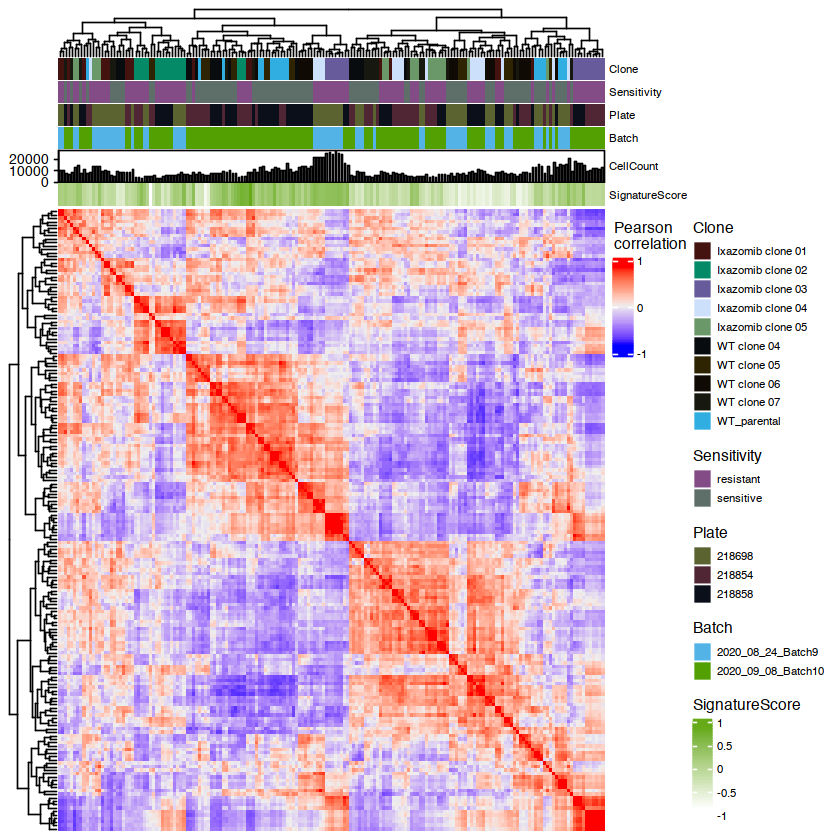

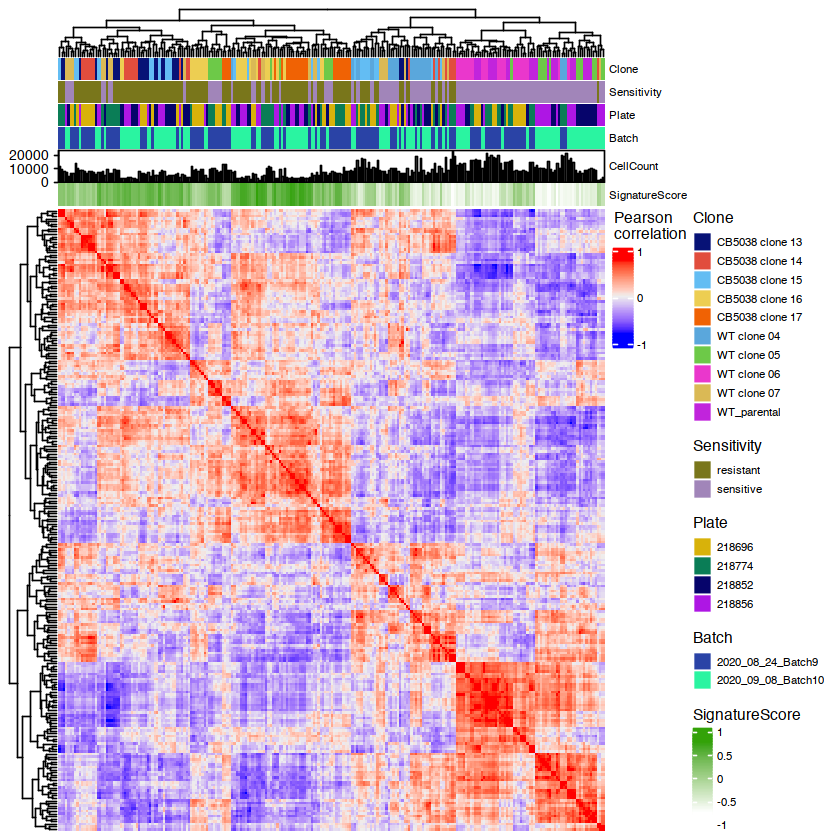

In [7]:
for (dataset in datasets) {
    # Determine features that were selected for the dataset
    selected_features <- features_df %>% dplyr::filter(dataset == !!dataset) %>% dplyr::pull(features)

    # Subset the signature results for later merge
    subset_score_df <- score_df %>%
        dplyr::filter(signature == !!dataset) %>%
        dplyr::select(Metadata_unique_sample_name, TotalScore)

    # Subset the data to only these features
    subset_data_df <- dataset_df %>%
        dplyr::filter(Metadata_dataset == !!dataset) %>%
        dplyr::select(starts_with("Metadata_"), !!!selected_features) %>%
        dplyr::filter(Metadata_treatment == "0.1% DMSO")  %>%
        dplyr::left_join(subset_score_df, by = "Metadata_unique_sample_name")

    # Obtain correlation matrix
    correlation_matrix_df <- t(subset_data_df %>% dplyr::select(!!!selected_features)) %>% cor()

    # Create heatmap
    ht = Heatmap(
        correlation_matrix_df,
        name = "Correlation",

        top_annotation = HeatmapAnnotation(
            Clone = subset_data_df$Metadata_clone_number,
            Sensitivity = subset_data_df$Metadata_clone_type,
            Plate = subset_data_df$Metadata_Plate,
            Batch = subset_data_df$Metadata_batch,
            CellCount = anno_barplot(
                subset_data_df$Metadata_cell_count,
                height = unit(anno_name_height * 1.5, "cm")
            ),
            SignatureScore = subset_data_df$TotalScore,

            annotation_legend_param = list(
                Clone = list(
                    title_gp = gpar(fontsize = lgd_title_fontsize),
                    labels_gp = gpar(fontsize = lgd_label_fontsize)
                ),
                Sensitivity = list(
                    title_gp = gpar(fontsize = lgd_title_fontsize),
                    labels_gp = gpar(fontsize = lgd_label_fontsize)
                ),
                Plate = list(
                    title_gp = gpar(fontsize = lgd_title_fontsize),
                    labels_gp = gpar(fontsize = lgd_label_fontsize)
                ),
                Batch = list(
                    title_gp = gpar(fontsize = lgd_title_fontsize),
                    labels_gp = gpar(fontsize = lgd_label_fontsize)
                ),
                SignatureScore = list(
                    title_gp = gpar(fontsize = lgd_title_fontsize),
                    labels_gp = gpar(fontsize = lgd_label_fontsize),
                    color_bar = "continuous"
                )
            ),
            simple_anno_size = unit(anno_name_height, "cm"),
            annotation_name_gp = gpar(fontsize = lgd_label_fontsize)
        ),
        
        heatmap_legend_param = list(
            title = "Pearson\ncorrelation",
            color_bar = "continuous",
            col_fun = legend_scale_cols,
            title_gp = gpar(fontsize = lgd_title_fontsize),
            title_position = "topleft",
            labels_gp = gpar(fontsize = lgd_label_fontsize),
            at = c(-1, 0, 1)
        )
    )

    # Save heatmap to file
    fig_file <- file.path(output_dir, paste0("heatmap_", dataset, ".pdf"))
    pdf(fig_file)
    draw(ht)
    dev.off()
    
    draw(ht)
}